In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
path = 'analysis_data/indicator.csv'
df = pd.read_csv(path)

In [3]:
# 读取.shp文件
shapefile_path = 'data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp'
gdf = gpd.read_file(shapefile_path)

# 合并数据
df = gdf.merge(df, left_on='LSOA11CD', right_on='Area')

# 删除 LAD11CD 列中值不等于 'E09000001' 的行
df = df[df['LAD11CD'] != 'E09000001']


In [23]:
# 计算每个指标的变化比例
df['ethnic_score'] = (df['ethnic_2021'] - df['ethnic_2011']) / df['ethnic_2011']
df['education_score'] = (df['education_2021'] - df['education_2011']) / df['education_2011']
df['elderly_score'] = (df['elderly_2021'] - df['elderly_2011']) / df['elderly_2011']
df['unemployed_score'] = (df['unemployed_2021'] - df['unemployed_2011']) / df['unemployed_2011']
df['median_house_price_score'] = (df['median_house_price_2021'] - df['median_house_price_2011']) / df['median_house_price_2011']

# 计算中产阶级化得分
df['gentrification_score'] = (df['education_score'] +
                              df['median_house_price_score'] -
                              df['elderly_score'] -
                              df['ethnic_score'] -
                              df['unemployed_score']
                              )

score = df[['Area', 'ethnic_score', 'education_score', 'elderly_score', 'unemployed_score', 'median_house_price_score', 'gentrification_score']]

df.to_csv('score.csv', index=False)

# 显示得分
print(score)


           Area  ethnic_score  education_score  elderly_score  \
4     E01000006     -0.001486        -0.031297       0.102564   
5     E01000007      0.040936        -0.239291      -0.390244   
6     E01000008      0.093294        -0.101583       0.384615   
7     E01000009     -0.086614         0.018462      -0.127451   
8     E01000010     -0.376443        -0.024194       3.187780   
...         ...           ...              ...            ...   
4830  E01033742     -0.058932        -0.145068       0.555556   
4831  E01033743     -0.022567        -0.052453       0.500000   
4832  E01033744      0.068966        -0.149506      -0.404255   
4833  E01033745      0.137521        -0.079032       0.636364   
4834  E01033746      0.339286        -0.129630       0.111801   

      unemployed_score  median_house_price_score  gentrification_score  
4            -0.014388                  0.704782              0.586795  
5             0.047619                  0.556604              0.619002  


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


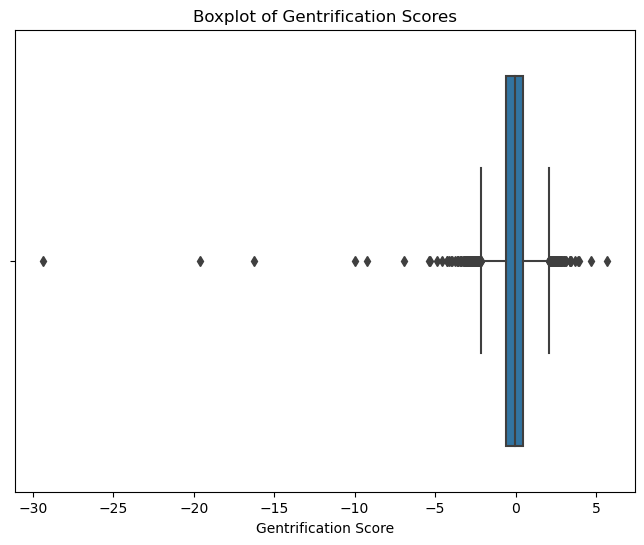

In [5]:
import seaborn as sns

# 绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['gentrification_score'])
plt.title('Boxplot of Gentrification Scores')
plt.xlabel('Gentrification Score')
plt.show()


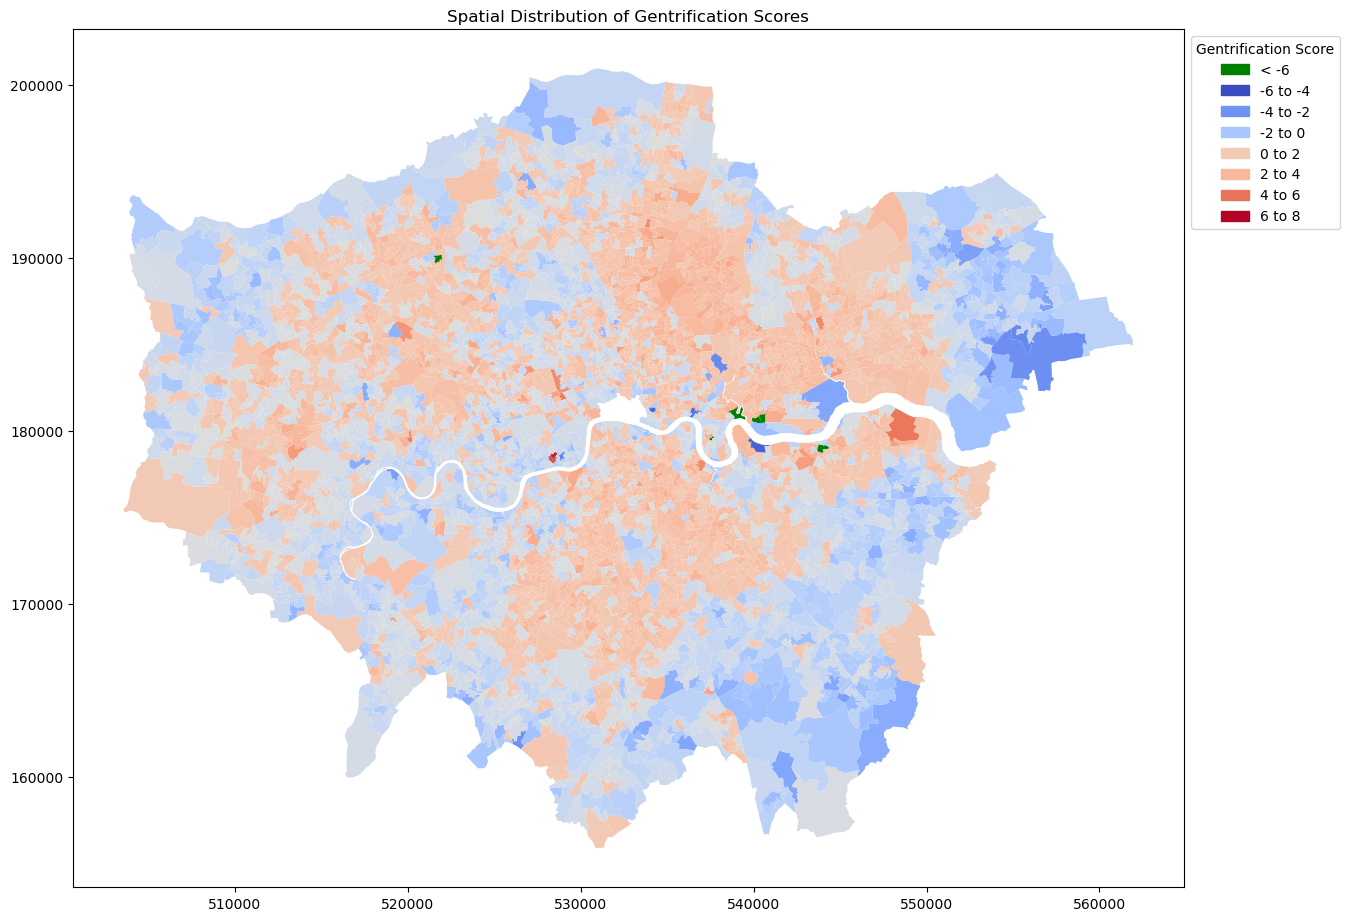

In [22]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches

# 自定义颜色映射函数
def custom_cmap(value):
    if value < -6:
        return 'green'
    elif 0 <= value < 2:
        return plt.cm.coolwarm(0.6 + value / 20)  # 调整 0-2 的颜色范围，使其更红且更淡
    else:
        return plt.cm.coolwarm((value + 6) / 12)  # 将其他值映射到 [-6, 6] 的范围

# 创建颜色列
df['color'] = df['gentrification_score'].apply(custom_cmap)

# 绘制地图
fig, ax = plt.subplots(figsize=(16, 16))  # 调整图像尺寸
df.plot(color=df['color'], ax=ax)

# 添加自定义图例
legend_labels = [mpatches.Patch(color='green', label='< -6')]  # 绿色部分
# 添加 coolwarm 图例部分
for i in range(7):
    value = -6 + i * 2  # -6, -4, -2, 0, 2, 4, 6
    if 0 <= value < 2:
        color = plt.cm.coolwarm(0.6 + value / 20)  # 淡红色调整
    else:
        color = plt.cm.coolwarm((value + 6) / 12)
    legend_labels.append(mpatches.Patch(color=color, label=f'{value} to {value + 2}'))

plt.legend(handles=legend_labels, title="Gentrification Score", loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Spatial Distribution of Gentrification Scores')

# 调整图像的间距，防止图例遮挡地图
plt.tight_layout(rect=[0, 0, 0.85, 1])

# 保存图像到文件
plt.savefig('data/gentrification_map.png', dpi=300, bbox_inches='tight')

# 显示图像（可选）
plt.show()


In [6]:
df = pd.read_csv('analysis_data/DID.csv')
print(df)

           Area  ethnic_2011  ethnic_2021  education_2011  education_2021  \
0     E01004647        0.338        0.405           0.507           0.415   
1     E01004649        0.446        0.528           0.505           0.302   
2     E01004724        0.365        0.331           0.468           0.387   
3     E01004730        0.395        0.457           0.463           0.307   
4     E01004646        0.325        0.410           0.464           0.443   
...         ...          ...          ...             ...             ...   
4824  E01002496        0.270        0.446           0.748           0.649   
4825  E01002497        0.315        0.449           0.738           0.581   
4826  E01002498        0.251        0.399           0.715           0.587   
4827  E01002499        0.300        0.368           0.733           0.635   
4828  E01032577        0.251        0.458           0.734           0.603   

      elderly_2011  elderly_2021  unemployed_2011  unemployed_2021  \
0    

In [11]:
# 构造2011年数据
df_2011 = df[['Area', 'ethnic_2011', 'education_2011', 'elderly_2011', 'unemployed_2011', 
              'median_house_price_2011', 'crime_2011', 'gentrification_score']].copy()
df_2011['Year'] = 2011
df_2011.rename(columns={'ethnic_2011': 'ethnic', 'education_2011': 'education', 
                        'elderly_2011': 'elderly', 'unemployed_2011': 'unemployed', 
                        'median_house_price_2011': 'median_house_price', 
                        'crime_2011': 'crime'}, inplace=True)
df_2011['post'] = 0

# 构造2021年数据
df_2021 = df[['Area', 'ethnic_2021', 'education_2021', 'elderly_2021', 'unemployed_2021', 
              'median_house_price_2021', 'crime_2021', 'gentrification_score']].copy()
df_2021['Year'] = 2021
df_2021.rename(columns={'ethnic_2021': 'ethnic', 'education_2021': 'education', 
                        'elderly_2021': 'elderly', 'unemployed_2021': 'unemployed', 
                        'median_house_price_2021': 'median_house_price', 
                        'crime_2021': 'crime'}, inplace=True)
df_2021['post'] = 1

# 合并2011和2021年数据
df_long = pd.concat([df_2011, df_2021], ignore_index=True)

# 定义gentrified变量
df_long['gentrified'] = df_long['gentrification_score'].apply(lambda x: 1 if x > 0 else 0)

# 显示重构后的数据
print(df_long.head())


        Area  ethnic  education  elderly  unemployed  median_house_price  \
0  E01004647   0.338      0.507    0.193    0.091582              655000   
1  E01004649   0.446      0.505    0.165    0.082532             1385000   
2  E01004724   0.365      0.468    0.130    0.087179              420000   
3  E01004730   0.395      0.463    0.195    0.095355              752500   
4  E01004646   0.325      0.464    0.123    0.088710             1050000   

      crime  gentrification_score  Year  post  gentrified  
0  0.066038              0.340901  2011     0           1  
1  0.062033             -1.072768  2011     0           0  
2  0.094265              0.178914  2011     0           1  
3  0.048678             -0.333997  2011     0           0  
4  0.054545              0.236005  2011     0           1  


In [20]:
import statsmodels.formula.api as smf

# 构建简化的DID模型
model = smf.ols('crime ~ gentrified + post + gentrified:post', data=df_long)
results = model.fit()

# 输出结果
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.19
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           3.17e-09
Time:                        12:54:40   Log-Likelihood:                 8542.8
No. Observations:                9658   AIC:                        -1.708e+04
Df Residuals:                    9654   BIC:                        -1.705e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0831      0.002     

In [16]:
# 计算交互项
df_long['gentrified_post_interaction'] = df_long['gentrified'] * df_long['post']

# 建立差异法模型
diff_in_diff_model = sm.OLS(df_long['crime'], df_long[['gentrified', 'post', 'gentrified_post_interaction', 'ethnic', 'education', 'elderly', 'unemployed', 'median_house_price']])
results = diff_in_diff_model.fit()

# 打印结果
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.420
Model:                            OLS   Adj. R-squared (uncentered):              0.420
Method:                 Least Squares   F-statistic:                              874.1
Date:                Mon, 05 Aug 2024   Prob (F-statistic):                        0.00
Time:                        11:30:39   Log-Likelihood:                          8585.6
No. Observations:                9658   AIC:                                 -1.716e+04
Df Residuals:                    9650   BIC:                                 -1.710e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# 假设df包含所有的变量和gentrified列
# 提取特征变量和处理变量
X = df_long[['ethnic', 'education', 'elderly', 'unemployed', 'median_house_price']]
y = df_long['gentrified']

# 使用逻辑回归估计倾向评分
log_reg = LogisticRegression()
log_reg.fit(X, y)
df_long['propensity_score'] = log_reg.predict_proba(X)[:, 1]

# 匹配处理组和对照组
treated = df_long[df_long['gentrified'] == 1]
control = df_long[df_long['gentrified'] == 0]

# 使用最近邻方法进行匹配
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(control['propensity_score'].values.reshape(-1, 1))
distances, indices = nbrs.kneighbors(treated['propensity_score'].values.reshape(-1, 1))

# 计算反事实和实际犯罪率差异
treated_crime = treated['crime']
matched_control_crime = control.iloc[indices.flatten()]['crime']
ATT = (treated_crime.values - matched_control_crime.values).mean()

print(f"中产阶级化对犯罪率的平均处理效应（ATT）: {ATT}")


中产阶级化对犯罪率的平均处理效应（ATT）: 0.005282193154081633


In [19]:
# 假设 df 中有列 'gentrification_score' (中产阶级化得分) 和 'crime' (犯罪率)
# 临界值设置为 0
df_long['treatment'] = (df_long['gentrification_score'] >= 0).astype(int)
df_long['running_variable'] = df_long['gentrification_score']

# 创建交互项
df_long['interaction'] = df_long['treatment'] * (df_long['running_variable'] - 0)

# 估计模型
model = smf.ols('crime ~ treatment + running_variable + interaction', data=df_long)
results = model.fit()

# 输出结果
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     28.46
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.59e-18
Time:                        12:19:31   Log-Likelihood:                 8564.0
No. Observations:                9658   AIC:                        -1.712e+04
Df Residuals:                    9654   BIC:                        -1.709e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0921      0.002  